In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")


In [17]:
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

print(train.head())
print(train.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [30]:
# Quick info and missing value checks
print(train.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
None


In [28]:
print('\nMissing values (train):')
print(train.isnull().sum())


Missing values (train):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [29]:

print('\nMissing values (test):')
print(test.isnull().sum())


Missing values (test):
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [32]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [31]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

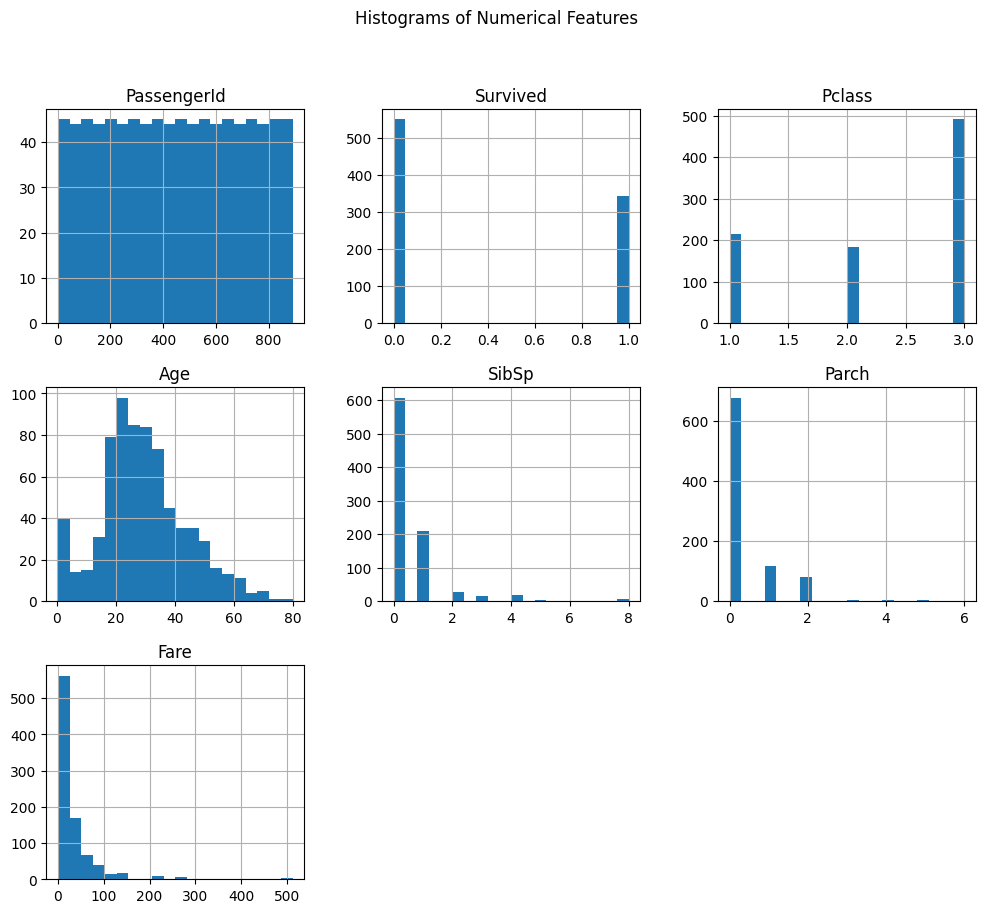

In [20]:
numeric_cols = train.select_dtypes(include=['int64','float64']).columns

train[numeric_cols].hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()


<Figure size 1200x600 with 0 Axes>

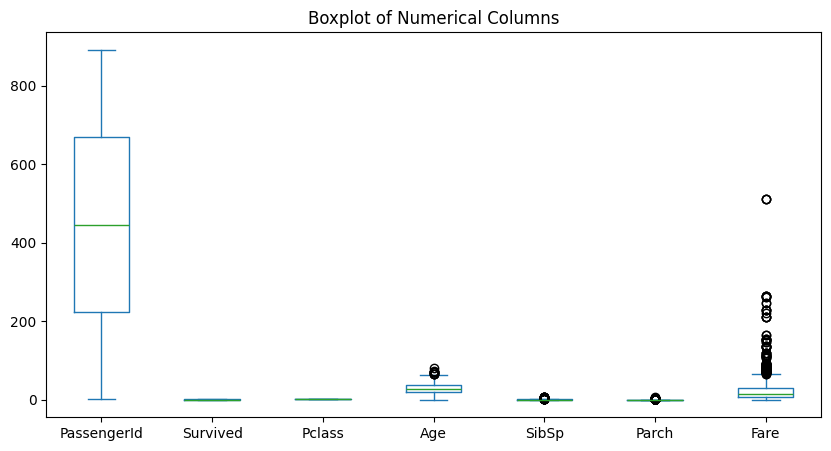

In [21]:
plt.figure(figsize=(12,6))
train[numeric_cols].plot(kind='box', subplots=False, figsize=(10,5))
plt.title("Boxplot of Numerical Columns")
plt.show()


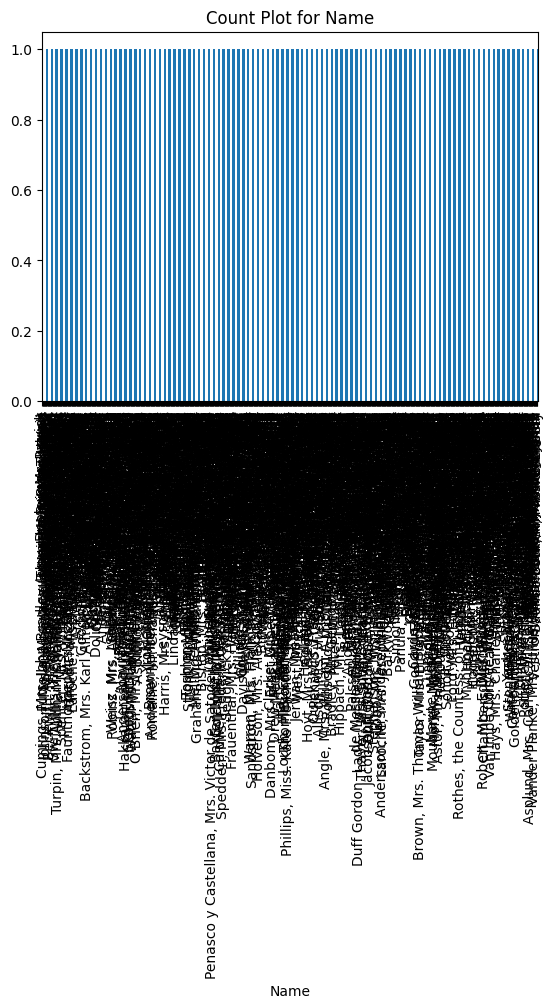

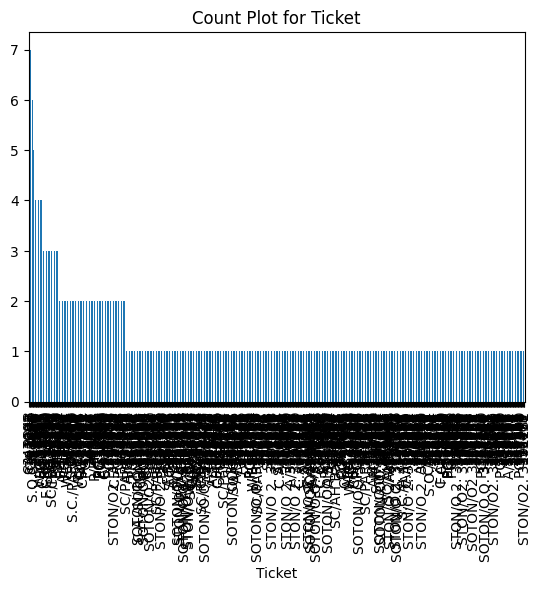

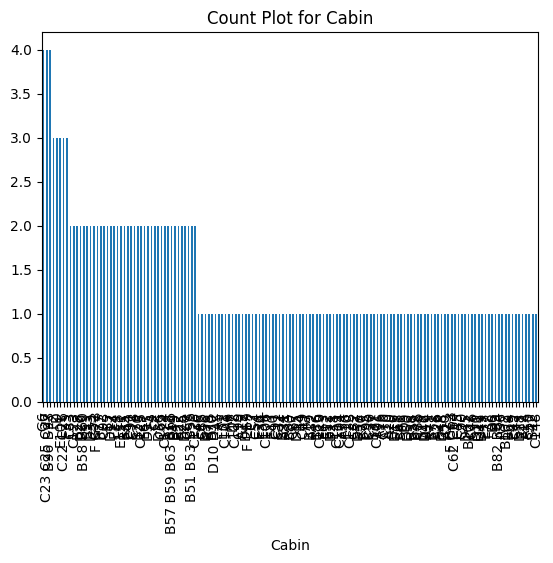

In [26]:
cat_cols = train.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure()
    train[col].value_counts().plot(kind='bar')
    plt.title(f"Count Plot for {col}")
    plt.show()


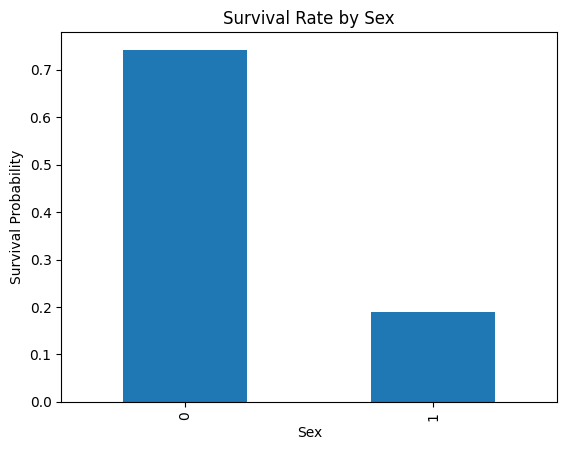

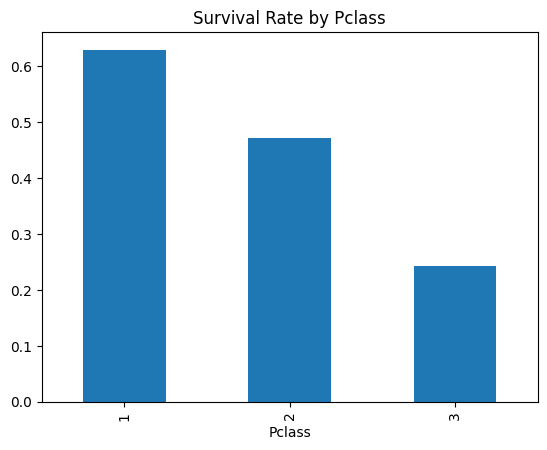

In [27]:
plt.figure()
train.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Probability")
plt.show()

plt.figure()
train.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Pclass")
plt.show()


In [33]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(train['Age'].median(), inplace=True)

test['Fare'].fillna(test['Fare'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [25]:
le = LabelEncoder()
for col in ['Sex','Embarked']:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])


In [11]:
X = train.drop(columns=['Survived','Name','Ticket','Cabin'])
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

lgb_pred = lgb_model.predict(X_val)

print("LGB Accuracy:", accuracy_score(y_val, lgb_pred))
print("LGB Precision:", precision_score(y_val, lgb_pred))
print("LGB Recall:", recall_score(y_val, lgb_pred))
print("LGB F1:", f1_score(y_val, lgb_pred))


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [13]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_val)

print("XGB Accuracy:", accuracy_score(y_val, xgb_pred))
print("XGB Precision:", precision_score(y_val, xgb_pred))
print("XGB Recall:", recall_score(y_val, xgb_pred))
print("XGB F1:", f1_score(y_val, xgb_pred))


XGB Accuracy: 0.7541899441340782
XGB Precision: 0.6984126984126984
XGB Recall: 0.6376811594202898
XGB F1: 0.6666666666666666


In [14]:
test_final_pred_lgb = lgb_model.predict(test.drop(columns=['Name','Ticket','Cabin'], errors='ignore'))
test_final_pred_xgb = xgb_model.predict(test.drop(columns=['Name','Ticket','Cabin'], errors='ignore'))

print("Test Predictions (LGBM):", test_final_pred_lgb[:10])
print("Test Predictions (XGBM):", test_final_pred_xgb[:10])


Test Predictions (LGBM): [0 0 0 0 0 0 0 0 1 0]
Test Predictions (XGBM): [0 0 0 0 0 0 0 0 1 0]


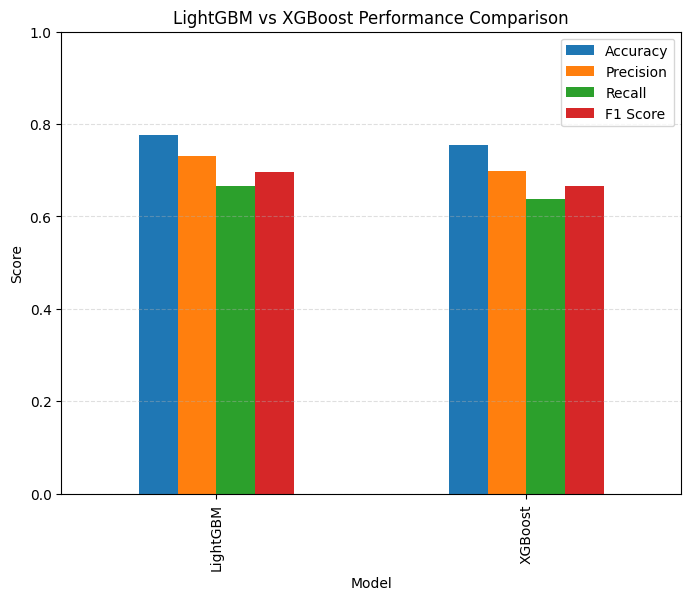

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_val, lgb_pred), accuracy_score(y_val, xgb_pred)],
    'Precision': [precision_score(y_val, lgb_pred),  precision_score(y_val, xgb_pred)],
    'Recall': [recall_score(y_val, lgb_pred), recall_score(y_val, xgb_pred)],
    'F1 Score': [f1_score(y_val, lgb_pred), f1_score(y_val, xgb_pred)]
})

results.set_index('Model').plot(kind='bar', figsize=(8,6))
plt.title("LightGBM vs XGBoost Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()
